# Practicum 1: Time discretization

This practicum looks at various effects of time discretization. Schemes are formulated for a generic equation


$$\frac{d \psi}{dt}=F(\psi)$$


The actual effects will be studied by applying the schemes to the oscillation equation:

$$\frac{d \psi}{dt}=i\kappa\psi$$

for which the exact solution is

$$\psi(t)=\psi_0e^{i\kappa t}$$



In [1]:
# load libraries for plotting and computing
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt



## 1. The forward scheme

The forward scheme discretizes a differential equation in time as

$$\frac{\phi^{n+1}-\phi^n}{\Delta t}=F(\phi^n)$$

From which

$$\phi^{n+1}=\phi^n+\Delta t F(\phi^n)$$.

Applied to the oscillation equation, this gives


$$\phi^{n+1}=\phi^n+i\kappa\Delta t \phi^n$$.


<IPython.core.display.Javascript object>


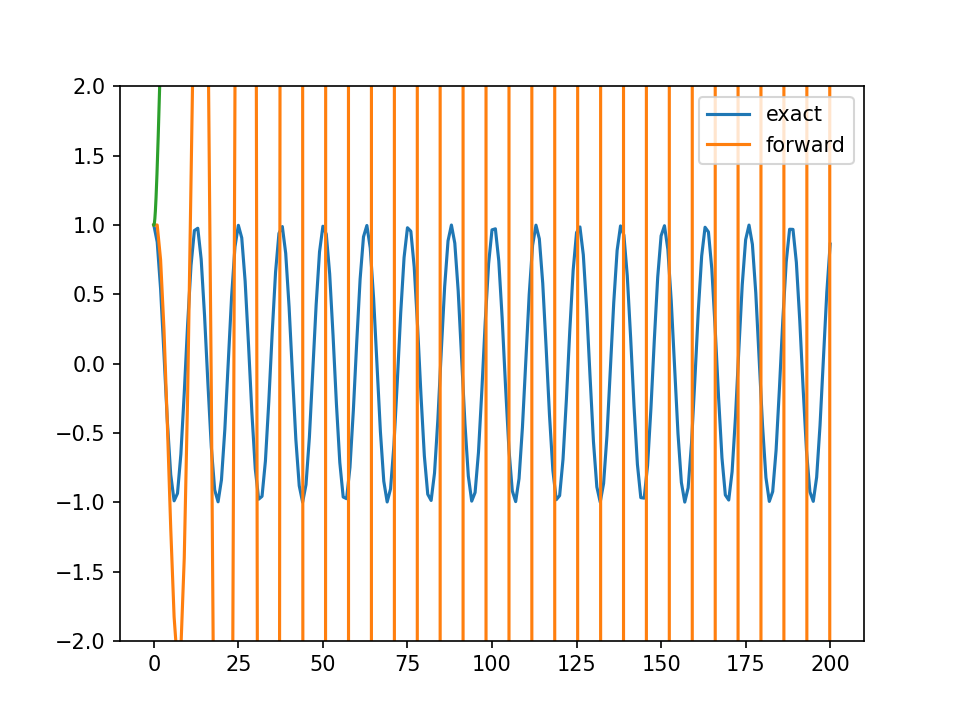

In [4]:
# parameters
dt=1.0
kappa=0.5
nt=200
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1

# time integration
for jt in range(nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    phi[jt+1]=(1+1j*kappa*dt)*phi[jt]

# plot results
plt.figure()
plt.plot(t,np.real(psi),label='exact')
plt.plot(t,np.real(phi),label='forward')
plt.legend()
plt.ylim([-2,2]);


We observe that the forward scheme is amplifying!

**Exercise**: examine if the scheme is accelerating or decelerating by increasing the value of `kappa`.

**Exercise**: plot the amplification factor as a function of $\kappa\Delta t$

<IPython.core.display.Javascript object>


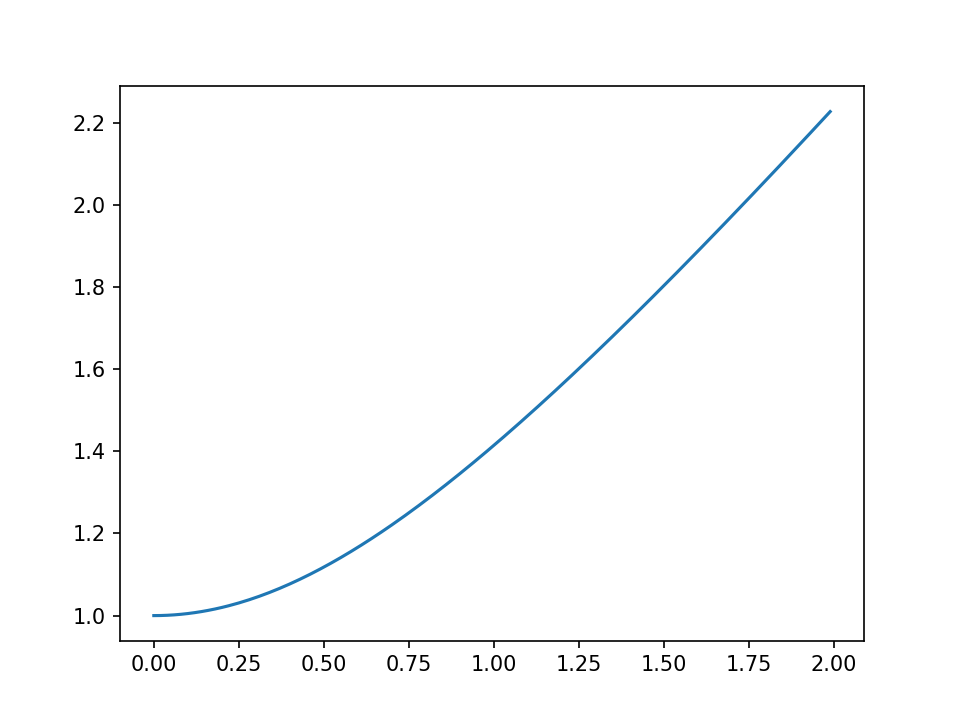

In [6]:
kdt=np.arange(200)/100
A=(1+1j*kdt)
plt.figure()
plt.plot(kdt,np.abs(A))


## 2. The backward and trapezium schemes

For the backward scheme, we write

$$\frac{\phi^{n+1}-\phi^n}{\Delta t}=F(\phi^{n+1})$$

Applied to the oscillation equation, this gives

$$\frac{\phi^{n+1}-\phi^n}{\Delta t}=i\kappa \phi^{n+1}$$,

from which

$$\phi^{n+1}=\frac{1}{1-i\kappa\Delta t}\phi^{n}$$


For the trapezium scheme, we write

$$\frac{\phi^{n+1}-\phi^n}{\Delta t}=\frac{1}{2}F(\phi^{n})+\frac{1}{2}F(\phi^{n+1})$$

Applied to the oscillation equation, this gives

$$\frac{\phi^{n+1}-\phi^n}{\Delta t}=\frac{i\kappa}{2}\left(\phi^n+\phi^{n+1}\right)$$,

from which

$$\phi^{n+1}=\frac{1+i\kappa\Delta t/2}{1-i\kappa\Delta t/2}\phi^{n}$$




**Exercise**: following the example of the forward scheme, compute and show the time evolution with the backward and the trapezium scheme. What is their effect on the amplitude and on the phase error?

<IPython.core.display.Javascript object>


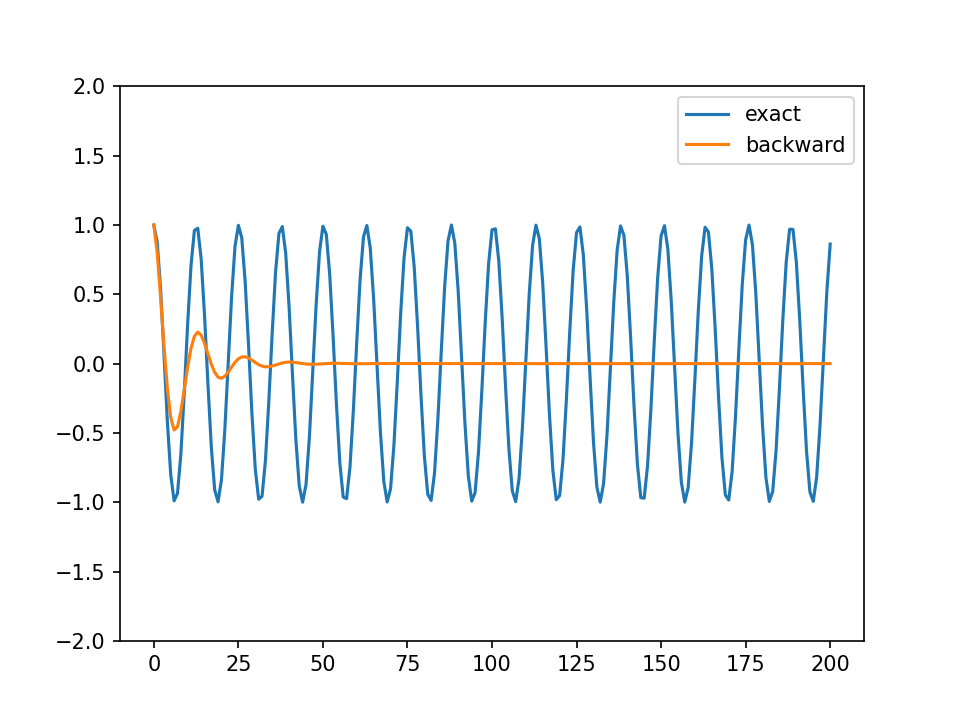

In [7]:
# parameters
dt=1.0
kappa=0.5
nt=200
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1

# time integration
for jt in range(nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    phi[jt+1]=1/(1-1j*kappa*dt)*phi[jt]

# plot results
plt.figure()
plt.plot(t,np.real(psi),label='exact')
plt.plot(t,np.real(phi),label='backward')
plt.legend()
plt.ylim([-2,2]);


<IPython.core.display.Javascript object>


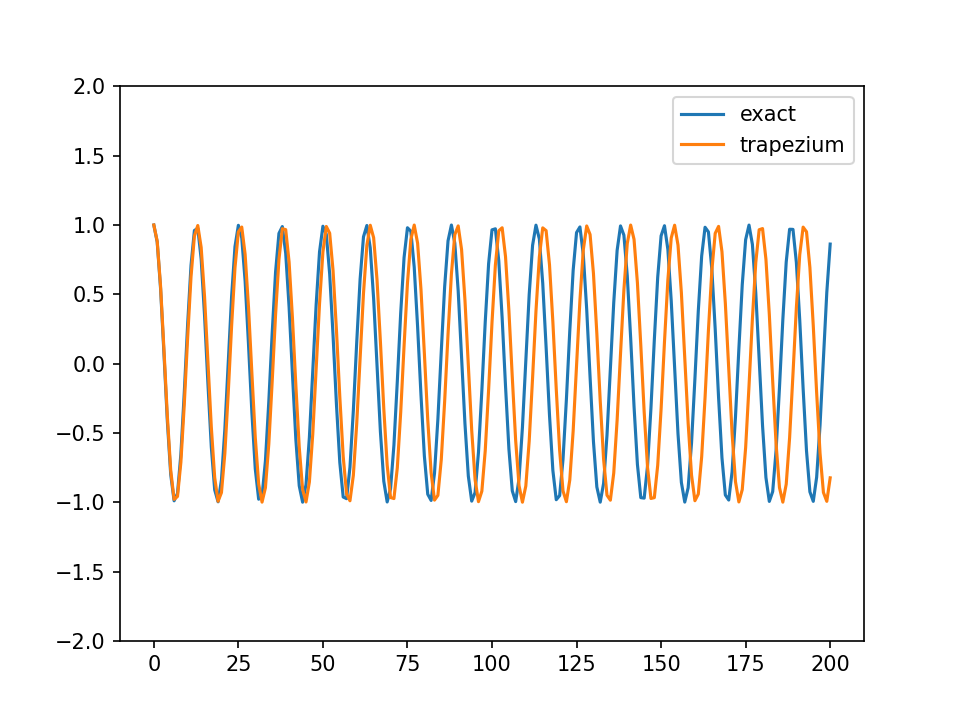

In [8]:
# parameters
dt=1.0
kappa=0.5
nt=200
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1

# time integration
for jt in range(nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    phi[jt+1]=(1+1j*kappa*dt/2)/(1-1j*kappa*dt/2)*phi[jt]

# plot results
plt.figure()
plt.plot(t,np.real(psi),label='exact')
plt.plot(t,np.real(phi),label='trapezium')
plt.legend()
plt.ylim([-2,2]);

## 3. Heun and Matsuno schemes

These are two-stage schemes. The Heun scheme is formulated as a combination of a forward stage and a trapezium stage:

$$
\begin{aligned}
    \tilde\phi &= \phi^n+\Delta t F(\phi^n) \\
    \phi^{n+1} &= \phi^n+\frac{\Delta t}{2}\left(F(\phi^n)+F(\tilde\phi)\right)
\end{aligned}
$$


<IPython.core.display.Javascript object>


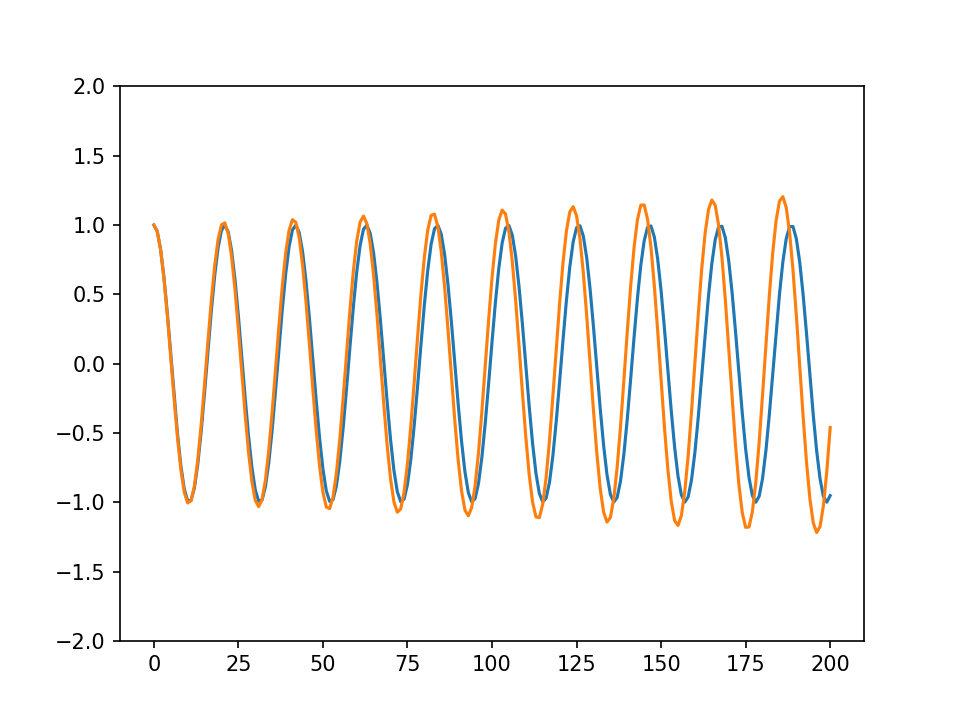

In [12]:
# parameters
dt=1.0
kappa=0.3
nt=200
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1

# time integration
for jt in range(nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    phi_tilde=(1+1j*kappa*dt)*phi[jt]
    phi[jt+1]=phi[jt]+1j*kappa*dt/2*(phi_tilde+phi[jt])

# plot results
plt.figure()
plt.plot(t,np.real(psi),label='exact')
plt.plot(t,np.real(phi),label='Heun')
plt.ylim([-2,2]);

The Heun scheme looks quite well. However, it is unconditionally unstable.

**Exercise**: show the instability of the Heun scheme by running it for a very long time (increase `nt`), or by increasing the value of `kappa` or `dt`.

The Matsuno scheme combines a forward stage (amplifying) with a backward stage (damping):

$$\begin{aligned}
    \tilde\phi &= \phi^n+\Delta t F(\phi^n)\\
    \phi^{n+1} &= \phi^n+\Delta t F(\tilde\phi)
\end{aligned}$$

**Exercise**: Check the results for the Matsuno scheme; is it amplifying or damping? Try different values for `kappa*dt`!


<IPython.core.display.Javascript object>


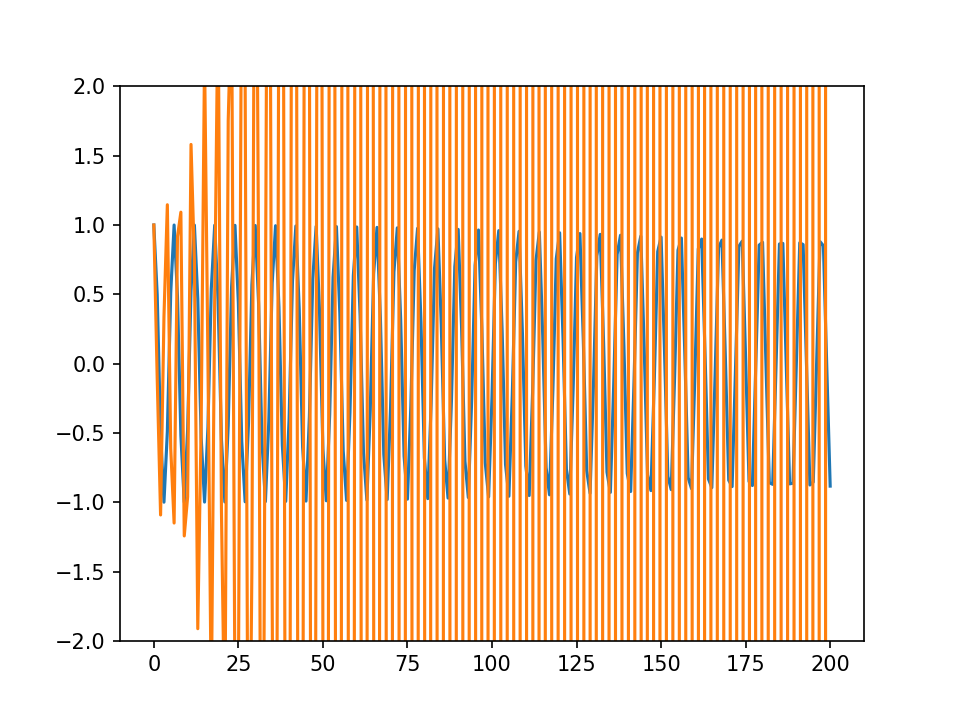

In [15]:
# parameters
dt=1.0
kappa=1.05
nt=200
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1

# time integration
for jt in range(nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    phi_tilde=(1+1j*kappa*dt)*phi[jt]
    phi[jt+1]=phi[jt]+1j*kappa*dt*(phi_tilde)

# plot results
plt.figure()
plt.plot(t,np.real(psi),label='exact')
plt.plot(t,np.real(phi),label='Matsuno')
plt.ylim([-2,2]);

## 4. Runge-Kutta-4

This popular scheme is 4th-order accurate. It is formulated as

$$
\begin{aligned}
    q_1 &= \Delta t F(\phi^n) \\
    q_2 &= \Delta t F(\phi^n+q_1/2) \\
    q_3 &= \Delta t F(\phi^n+q_2/2) \\
    q_4 &= \Delta t F(\phi^n+q_3) \\
    \phi^{n+1} &= \phi^n+\frac{1}{6}\left(q_1+2q_2+2q_3+q_4\right)
\end{aligned}
$$

**Exercise**: Implement the RK4 scheme and verify its stability.



<IPython.core.display.Javascript object>


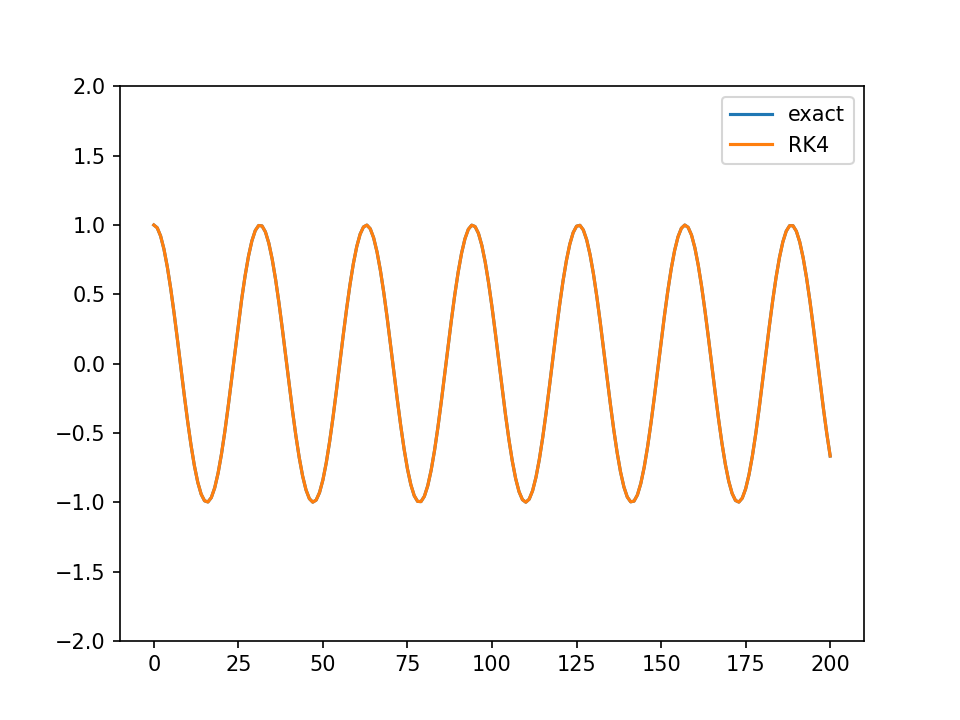

In [29]:
# parameters
dt=1.0
kappa=0.2
nt=200
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1

# time integration
for jt in range(nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    q1=1j*kappa*dt*phi[jt]
    q2=1j*kappa*dt*(phi[jt]+q1/2)
    q3=1j*kappa*dt*(phi[jt]+q2/2)
    q4=1j*kappa*dt*(phi[jt]+q3)
    phi[jt+1]=phi[jt]+(q1+2*q2+2*q3+q4)/6

# plot results
plt.figure()
plt.plot(t,np.real(psi),label='exact')
plt.plot(t,np.real(phi),label='RK4')
plt.legend()
plt.ylim([-2,2]);

## 5. Leapfrog scheme

The leapfrog scheme is a 3-timelevel scheme, i.e. it uses information from the current timestep $t$ and from the previous timestep $t-\Delta t$ to determine the solution at the next timestep $t+\Delta t$. It is formulated as:

$$\frac{\phi^{n+1}-\phi^{n-1}}{2\Delta t}=F(\phi^n)$$,

from which

$$\phi^{n+1}=\phi^{n-1}+2\Delta tF(\phi^n)$$.

Note that during the first timestep, a different timescheme has to be used, e.g. the forward scheme. (The amplification during a single timestep is assumed to be acceptable).

**Exercise:** Implement the leapfrog scheme and verify its stability.


<IPython.core.display.Javascript object>


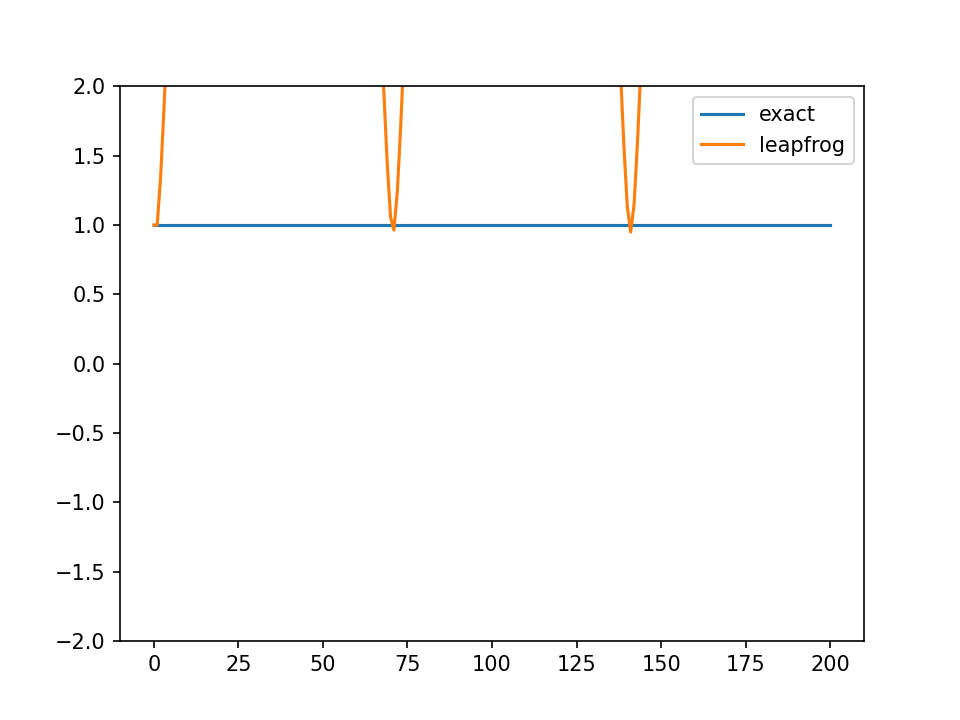

In [49]:
# parameters
dt=1.0
kappa=0.999
nt=200
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1

# time integration
jt=0
psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
phi[jt+1]=(1+1j*kappa*dt/2)/(1-1j*kappa*dt/2)*phi[jt]  # forward scheme

# leapfrog
for jt in range(1,nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    phi[jt+1]=phi[jt-1]+2*1j*kappa*dt*phi[jt]

# plot results
plt.figure()
plt.plot(t,np.abs(psi),label='exact')
plt.plot(t,np.abs(phi),label='leapfrog')
plt.ylim([-2,2])
plt.legend()

Being a 3-timelevel scheme, the leapfrog scheme in fact has two modes in its solution: a physical mode and an artificial computational mode. 

**Exercise**: Try to make the computational mode appear, by putting an intentional error in the first timestep, e.g. by adding a small extra term to $\phi^1$. The computational mode manifests itself by a ping-pong behaviour between even and odd timesteps.

<IPython.core.display.Javascript object>


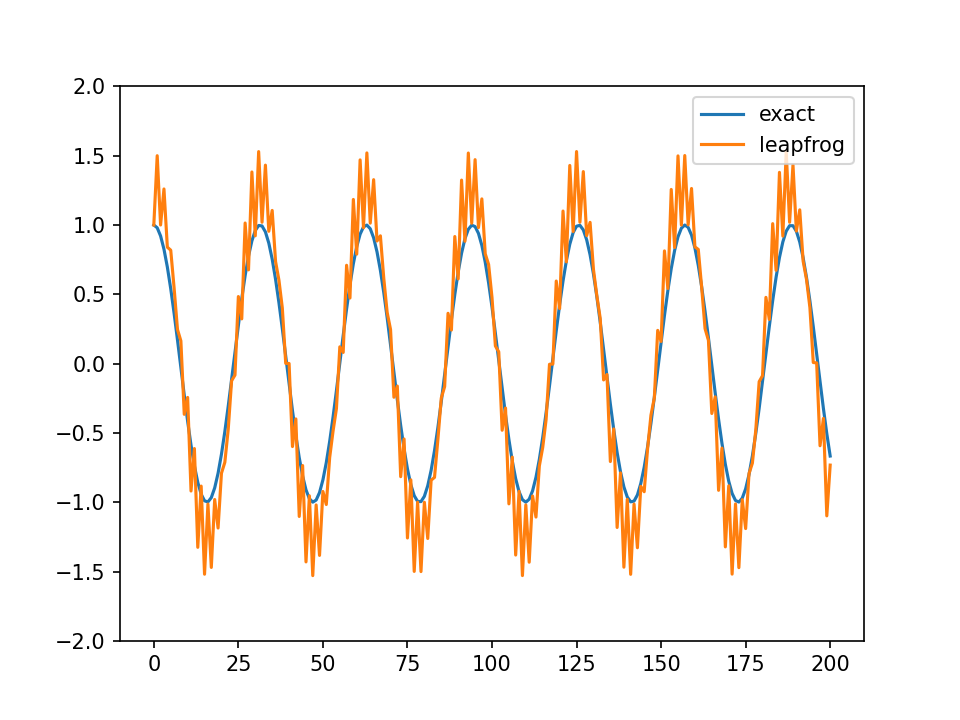

In [43]:
# parameters
dt=1.0
kappa=0.2
nt=200
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1

# time integration
jt=0
psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
phi[jt+1]=1.5  # forward scheme

# leapfrog
for jt in range(1,nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    phi[jt+1]=phi[jt-1]+2*1j*kappa*dt*phi[jt]

# plot results
plt.figure()
plt.plot(t,np.real(psi),label='exact')
plt.plot(t,np.real(phi),label='leapfrog')
plt.ylim([-2,2])
plt.legend()

The computational mode can be damped by implementing a Robert-Asselin filter:

$$
\begin{aligned}
    \phi^{n+1} &= \overline{\phi^{n-1}}+2\Delta t F(\phi^n) \\
    \overline{\phi^n} &= \phi^n+\gamma\left(\overline{\phi^{n-1}}-2\phi^n+\phi^{n+1}\right)
\end{aligned}
$$

**Exercise**: Implement the Robert-Asselin filter to the sabotaged leapfrog from above, and watch the computational mode getting damped.

<IPython.core.display.Javascript object>


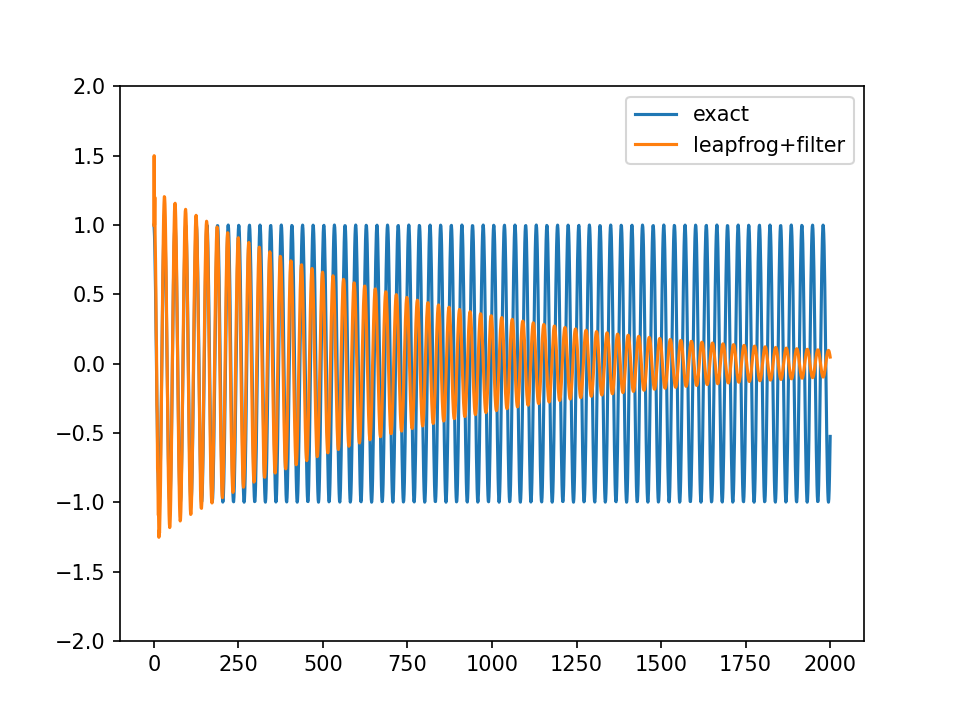

In [55]:
# parameters
dt=1.0
kappa=0.2
gamma=0.06
nt=2000
t=np.arange(nt+1)*dt

# allocate solution
psi=np.zeros(nt+1,dtype=complex)
phi=np.zeros(nt+1,dtype=complex)
phi_f=np.zeros(nt+1,dtype=complex)

# initial conditions
psi[0]=1
phi[0]=1
phi_f[0]=1

# time integration
jt=0
psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
phi[jt+1]=1.5  # forward scheme

# leapfrog
for jt in range(1,nt):
    psi[jt+1]=np.exp(1j*kappa*dt)*psi[jt]
    phi[jt+1]=phi_f[jt-1]+2*1j*kappa*dt*phi[jt]
    phi_f[jt]=phi[jt]+gamma*(phi_f[jt-1]-2*phi[jt]+phi[jt+1])

# plot results
plt.figure()
plt.plot(t,np.real(psi),label='exact')
plt.plot(t,np.real(phi),label='leapfrog+filter')
plt.ylim([-2,2])
plt.legend()
